In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 


C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"D:\LP3\ML_Assignments\Datasets\uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1)

In [5]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace=True)

## Remove Outliers

In [7]:
zscores = stats.zscore(df['fare_amount'])
z_threshold = 3

In [8]:
df_filtered = df[abs(zscores) <= z_threshold]
outliers = df[abs(zscores) > z_threshold]

outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
48,56.80,-73.993498,40.764686,-73.993498,40.764686,1
84,49.57,-73.975058,40.788820,-73.975058,40.788820,1
104,43.00,-73.862701,40.768959,-73.999092,40.741829,2
204,45.00,-73.971663,40.757812,-73.789273,40.641790,1
226,49.80,-73.992122,40.748577,-73.806072,40.665272,1
...,...,...,...,...,...,...
199914,57.33,-73.776778,40.645427,-73.948572,40.789107,5
199972,45.00,-73.786833,40.639842,-74.001215,40.722429,1
199976,49.70,-73.978225,40.783318,-73.700963,40.705852,1
199977,43.50,-73.996671,40.737483,-73.867758,40.897563,1


## Linear Regression

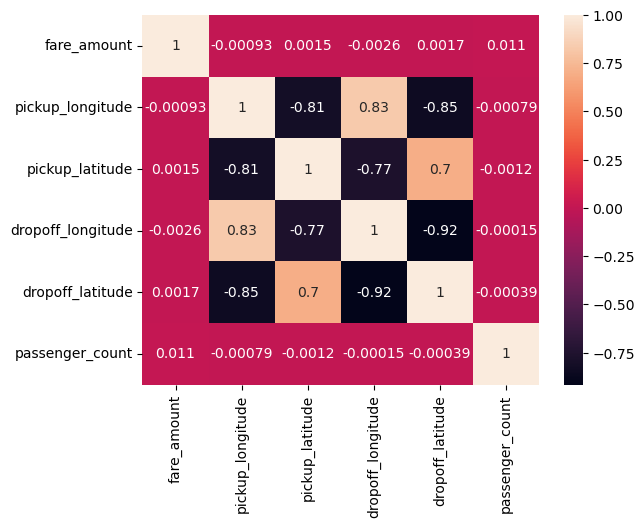

In [9]:
corr_matrix = sns.heatmap(df_filtered.corr(), annot=True)
plt.show()

## Linear Regression Prediction Model

In [10]:
y = df_filtered['fare_amount']
X = df_filtered.drop(['fare_amount'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
R2 = r2_score(y_test, y_pred)
R2

4.203886413445268e-05

In [14]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

6.457926179274839

## Random Forest Regressor Prediction Model

In [15]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
R2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {R2}")
print(f"MSE Score: {RMSE}")


R2 Score: 0.793425847231895
MSE Score: 2.9352168725293772
